데이터 전처리 고민
- 패턴이 없는 데이터를 패턴이 있는 데이터로 만들기 위한 시도

In [5]:
def generator():
  i= 0 
  while True :
    i +=1 
    yield i

for item in generator() :
  print(item)
  if item> 4: 
    break

1
2
3
4
5


# Roll과 Pitch 구해 보기

In [ ]:
import math
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/drive/My Drive/FinalprojectData/LogData_10000.csv', index_col=0 )
df.head()

,X1,Y1,Z1,X2,Y2,Z2
0,0.008789,-0.030029,1.103027,-0.015686,-0.015686,-0.015686
1,0.014160,-0.039062,1.109131,-0.015686,-0.015686,-0.015686
2,0.009766,-0.029541,1.084961,-0.015686,-0.015686,-0.015686
3,0.017334,-0.035400,1.098145,-0.015686,-0.015686,-0.015686
4,0.014648,-0.035645,1.091797,-0.015686,-0.015686,-0.015686


In [ ]:
df.shape

(10000, 6)

In [ ]:
# roll 구하는 함수
def roll(x, y, z):
  rolled = list()
  for i in range(len(x)):
    a = 180 * math.atan( y[i] / np.sqrt( x[i]**2 + z[i]**2) ) / math.pi
    rolled.append(a)
  return rolled

In [ ]:
# pitch 구하는 함수
def pitch(x, y, z):
  pitched = list()
  for i in range(len(x)):
    a = 180 * math.atan( x[i] / np.sqrt( y[i]**2 + z[i]**2) ) / math.pi
    pitched.append(a)
  return pitched

In [ ]:
type(df.X1)

pandas.core.series.Series

In [ ]:
df['roll'] = roll(df.X1, df.Y1, df.Z1)

In [ ]:
df.head()

,X1,Y1,Z1,X2,Y2,Z2,roll
0,0.008789,-0.030029,1.103027,-0.015686,-0.015686,-0.015686,-1.559396
1,0.014160,-0.039062,1.109131,-0.015686,-0.015686,-0.015686,-2.016877
2,0.009766,-0.029541,1.084961,-0.015686,-0.015686,-0.015686,-1.559584
3,0.017334,-0.035400,1.098145,-0.015686,-0.015686,-0.015686,-1.846128
4,0.014648,-0.035645,1.091797,-0.015686,-0.015686,-0.015686,-1.869761


In [ ]:
import matplotlib.pyplot as plt

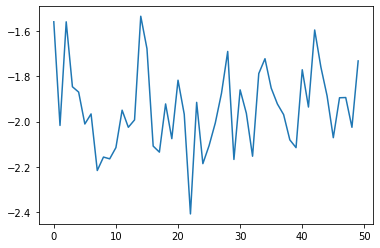

In [ ]:
# 패턴을 보이는 데이터가 아님
df.roll[:50].plot()

# 푸리에 변환 시도

In [ ]:
from scipy.fftpack import fft, fftfreq, ifft

In [ ]:
temp=np.sqrt(df.X1**2 + df.Y1**2 + df.Z1**2)

In [ ]:
ffted=fft(temp.values)

In [ ]:
temp2=ffted.tolist()

In [ ]:
type(temp2[0])

complex

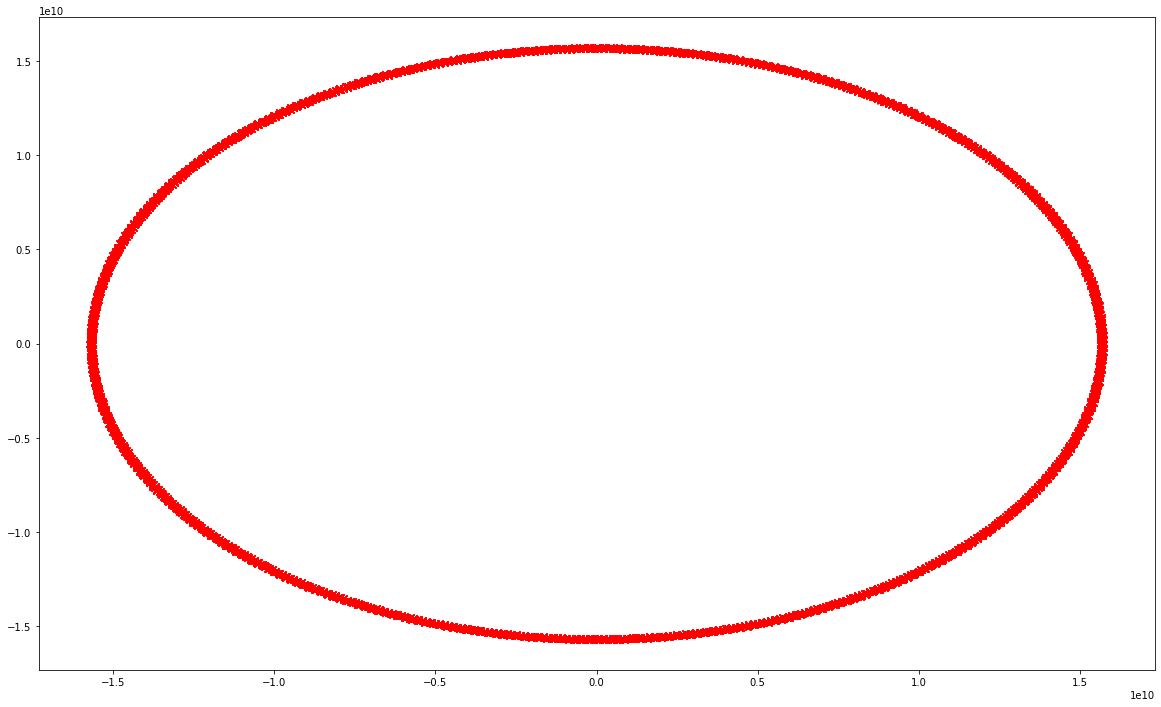

In [ ]:
plt.figure(figsize=(20,12))
X = [x.real for x in temp2]
Y = [x.imag for x in temp2]
plt.scatter(X,Y, color='red', marker='x')
plt.show()

In [ ]:
n=fft(df.X1.tolist())

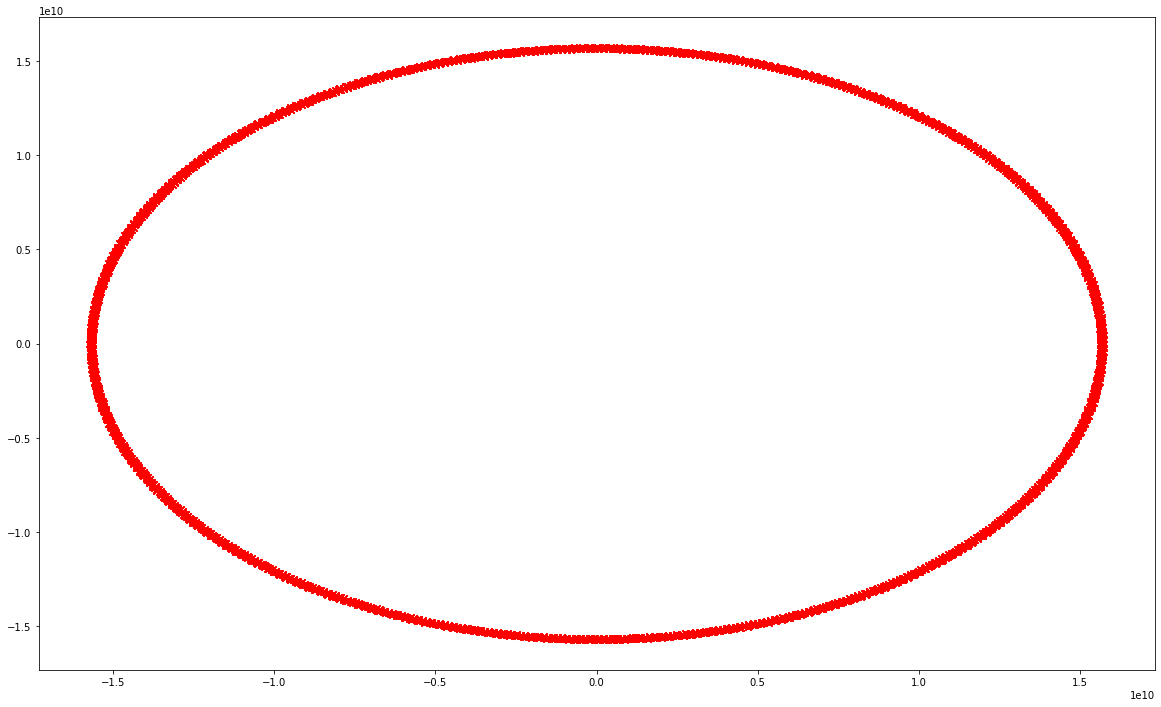

In [ ]:
plt.figure(figsize=(20,12))
X = [x.real for x in n]
Y = [x.imag for x in n]
plt.scatter(X,Y, color='red', marker='x')
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [ ]:
# 학습데이터 80%
train_size = int(len(temp2) * 0.8)
# 테스트데이터 나머지20%
test_size = len(temp2) - train_size
train, test = temp2[0:train_size], temp2[train_size:]
print(len(train), len(test))

8000 2000


In [ ]:
# 데이터 세팅함수
def create_dataset(X, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)        
        ys.append(X[i+time_steps])
        # y는 time_step 다음 값으로 설정
    return np.array(Xs), np.array(ys)

In [ ]:
time_steps = 40 # 20, 40, 80 등으로 다양하게 시도해봄 -> 결과에 유의미한 차이 없었음

X_train, y_train = create_dataset(train, time_steps)
X_test, y_test = create_dataset(test, time_steps)

print(X_train.shape, y_train.shape)

(7960, 40) (7960,)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_train.shape

(7960, 40, 1)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.001))

In [ ]:
history = model.fit(
    X_train, y_train, 
    epochs=30,  # epoch 30, 100 시도 -> 별 차이 없음
    batch_size=20, 
    validation_split=0.1, 
    verbose=1, 
    shuffle=False
)

Epoch 1/30
359/359 [==============================] - 13s 37ms/step - loss: 123042942176412565504.0000 - val_loss: 123035271983297200128.0000
Epoch 2/30
359/359 [==============================] - 13s 35ms/step - loss: 123042942176412565504.0000 - val_loss: 123035271983297200128.0000
Epoch 3/30
359/359 [==============================] - 13s 35ms/step - loss: 123042942176412565504.0000 - val_loss: 123035271983297200128.0000
Epoch 4/30
359/359 [==============================] - 13s 37ms/step - loss: 123042942176412565504.0000 - val_loss: 123035271983297200128.0000
Epoch 5/30
359/359 [==============================] - 14s 38ms/step - loss: 123042942176412565504.0000 - val_loss: 123035271983297200128.0000
Epoch 6/30
359/359 [==============================] - 14s 38ms/step - loss: 123042942176412565504.0000 - val_loss: 123035271983297200128.0000
Epoch 7/30
359/359 [==============================] - 13s 36ms/step - loss: 123042942176412565504.0000 - val_loss: 123035271983297200128.0000
Epoch 

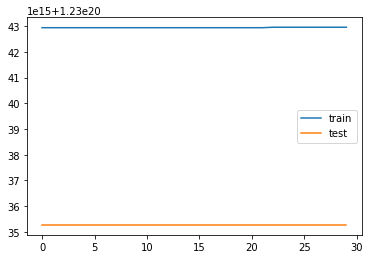

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [ ]:
# reshape필요
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
y_pred = model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


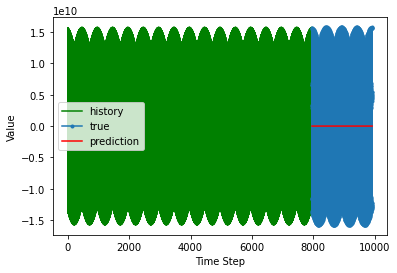

In [ ]:
# 예측값 실제값 그래프 확인
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


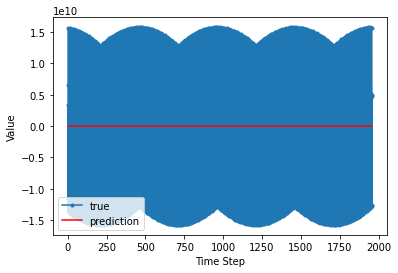

In [ ]:
# 예측값과 실제값 비교
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

# 축간 연관관계 확인

In [ ]:
np.corrcoef(df.X1, df.Y1)

array([[1.00000000e+00, 1.12985204e-04],
       [1.12985204e-04, 1.00000000e+00]])

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
model = sm.OLS( df.X1, sm.add_constant(df.Y1))
result = model.fit()
print( result.summary())

                            OLS Regression Results                            
Dep. Variable:                     X1   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                 0.0001276
Date:                Tue, 06 Oct 2020   Prob (F-statistic):              0.991
Time:                        03:16:30   Log-Likelihood:            -2.0290e+05
No. Observations:               10000   AIC:                         4.058e+05
Df Residuals:                    9998   BIC:                         4.058e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.575e+06   1.57e+06      1.004      0.3

In [ ]:
model = sm.OLS( df.X1, sm.add_constant(df.Z1))
result = model.fit()
print( result.summary())

                            OLS Regression Results                            
Dep. Variable:                     X1   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                 0.0002490
Date:                Tue, 06 Oct 2020   Prob (F-statistic):              0.987
Time:                        03:19:12   Log-Likelihood:            -2.0290e+05
No. Observations:               10000   AIC:                         4.058e+05
Df Residuals:                    9998   BIC:                         4.058e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.575e+06   1.57e+06      1.004      0.3

- 연관성 없음을 확인